In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("../../data/df_posts_transcripts.csv")

In [13]:
df['textLanguage'].unique()

array(['de', 'en'], dtype=object)

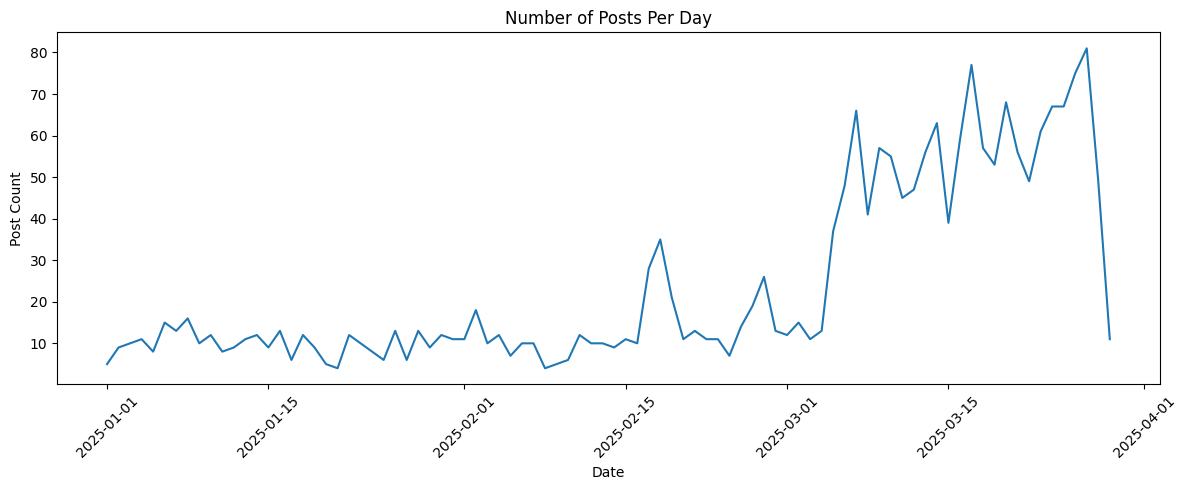

In [15]:
# Ensure createTimeISO is UTC-aware
df["createTimeISO"] = pd.to_datetime(df["createTimeISO"], utc=True, errors="coerce")

# Use UTC-aware filter date
start_date = pd.Timestamp("2025-01-01", tz="UTC")

# Filter
mask = df["createTimeISO"] >= start_date

# Count posts per day
posts_per_day = df.loc[mask, "createTimeISO"].dt.date.value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 5))
posts_per_day.plot()
plt.title("Number of Posts Per Day")
plt.xlabel("Date")
plt.ylabel("Post Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
